# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Assign base url for API's call

base_url = "http://api.openweathermap.org/data/2.5/weather?q="

In [4]:
#Set empty lists to hold cities data

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country_code = []

In [5]:
# Loop trough the list of cities and perform a request on each

print(f"""
Beginning Data Retrieval
----------------------------""")

for i, city in enumerate(cities):
    query_url = f"{base_url}{city}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    #print(json.dumps(response, indent = 4))
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country_code.append(response["sys"]["country"])
        print(f"Processing Record: {i} : {city}")
    except:
        print(f"City not found. Skipping...")
        
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        country_code.append(None)
        


Beginning Data Retrieval
----------------------------
Processing Record: 0 : castro
City not found. Skipping...
Processing Record: 2 : fortuna
Processing Record: 3 : mar del plata
Processing Record: 4 : hermanus
Processing Record: 5 : korla
Processing Record: 6 : avarua
City not found. Skipping...
Processing Record: 8 : sibolga
Processing Record: 9 : new norfolk
Processing Record: 10 : ballina
Processing Record: 11 : busselton
Processing Record: 12 : hasaki
City not found. Skipping...
Processing Record: 14 : uvinza
Processing Record: 15 : vaini
City not found. Skipping...
Processing Record: 17 : maniitsoq
Processing Record: 18 : punta arenas
Processing Record: 19 : elizabeth city
City not found. Skipping...
Processing Record: 21 : mogzon
Processing Record: 22 : poum
Processing Record: 23 : hamilton
Processing Record: 24 : georgetown
Processing Record: 25 : saldanha
Processing Record: 26 : hobart
Processing Record: 27 : colares
Processing Record: 28 : hithadhoo
Processing Record: 29 : 

Processing Record: 243 : ancud
Processing Record: 244 : severnyy
City not found. Skipping...
Processing Record: 246 : storm lake
Processing Record: 247 : porto santo
Processing Record: 248 : mayo
Processing Record: 249 : aqtobe
Processing Record: 250 : ellisras
Processing Record: 251 : iquique
City not found. Skipping...
City not found. Skipping...
Processing Record: 254 : teguldet
Processing Record: 255 : zumpahuacan
Processing Record: 256 : sarangani
Processing Record: 257 : katsuura
Processing Record: 258 : crotone
Processing Record: 259 : jiexiu
Processing Record: 260 : tevaitoa
Processing Record: 261 : alamosa
Processing Record: 262 : querfurt
Processing Record: 263 : gonbad-e qabus
Processing Record: 264 : leningradskiy
Processing Record: 265 : zaragoza
Processing Record: 266 : yuanping
Processing Record: 267 : guerrero negro
Processing Record: 268 : cabrera
Processing Record: 269 : yulara
City not found. Skipping...
Processing Record: 271 : birobidzhan
Processing Record: 272 : s

Processing Record: 489 : kaitangata
Processing Record: 490 : tutoia
Processing Record: 491 : warrensburg
Processing Record: 492 : plettenberg bay
Processing Record: 493 : ronne
Processing Record: 494 : omboue
Processing Record: 495 : moose factory
Processing Record: 496 : nacogdoches
Processing Record: 497 : garowe
City not found. Skipping...
Processing Record: 499 : chicacao
Processing Record: 500 : inndyr
Processing Record: 501 : ghanzi
Processing Record: 502 : ust-tsilma
Processing Record: 503 : westport
Processing Record: 504 : byron bay
Processing Record: 505 : honiara
Processing Record: 506 : inhambane
Processing Record: 507 : juba
Processing Record: 508 : chapais
Processing Record: 509 : shafranovo
City not found. Skipping...
Processing Record: 511 : gizo
Processing Record: 512 : mwense
Processing Record: 513 : marsh harbour
Processing Record: 514 : vaitape
Processing Record: 515 : saint-joseph
Processing Record: 516 : hit
Processing Record: 517 : shache
Processing Record: 518 :

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
        "City": cities,
        "Lat" : lat,
        "Lng" : lng,
        "Max Temp" : max_temp,
        "Humidity" : humidity,
        "Cloudiness" : cloudiness,
        "Wind Speed" : wind_speed,
        "Country Code" : country_code
                          })

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Code
0,castro,-24.7911,-50.0119,293.56,79.0,1.0,2.97,BR
1,lolua,NaN,NaN,NaN,NaN,NaN,NaN,None
2,fortuna,40.5982,-124.1573,284.82,93.0,90.0,5.66,US
3,mar del plata,-38.0023,-57.5575,293.71,100.0,75.0,1.54,AR
4,hermanus,-34.4187,19.2345,295.37,44.0,74.0,1.79,ZA


In [24]:
#Save DF to Resources

write_path = os.path.join("Resources", "cities_weather_data.csv")
weather_df.to_csv(write_path, index=False)

In [25]:
#In order to have the same results for analysis, read the file saved above

csv_path = os.path.join("Resources", "cities_weather_data.csv")
weather_df = pd.read_csv(csv_path, index_col=False)
weather_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Code
0,0,castro,-24.7911,-50.0119,293.56,79.0,1.0,2.97,BR
1,1,lolua,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,fortuna,40.5982,-124.1573,284.82,93.0,90.0,5.66,US
3,3,mar del plata,-38.0023,-57.5575,293.71,100.0,75.0,1.54,AR
4,4,hermanus,-34.4187,19.2345,295.37,44.0,74.0,1.79,ZA


In [45]:
#Drop NAs from the data frame

weather_df.dropna(inplace=True)

#Drop Column Unnamed added even when index=False specified

weather_df.drop(["Unnamed: 0"], axis =1, inplace = True)

In [46]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.00000
mean,20.018713,18.778077,283.372385,72.553004,55.353357,3.76788
std,33.378058,91.245626,19.007007,19.683420,37.778800,2.59841
min,-54.800000,-175.200000,235.480000,8.000000,0.000000,0.15000
25%,-7.822525,-60.742950,269.150000,63.000000,20.000000,1.89000
50%,25.247750,22.208700,290.150000,77.000000,74.000000,3.09000
75%,48.770800,102.140800,299.150000,86.000000,90.000000,5.14000
max,78.218600,179.316700,316.050000,100.000000,100.000000,14.92000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
humidity_over_100 = weather_df.loc[weather_df["Humidity"] > 100]
humidity_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Code


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

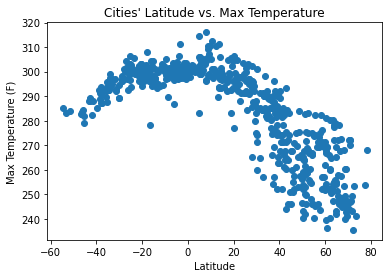

In [75]:
#Scatter Plot for Lat vs Max Temp

x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.title("Cities' Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save the plot and show it
plt.savefig("Images/Lat_vs_Temp.png")
plt.show()

plt.close()

- It seems that Latitude and Maximum Temperature of a City has a negative correlation from the Latitude 0 to the other higher latitudes, this means that from Latitude 0, the higher the Latitude of a city, it would be expected that the Maximum Tempereature will be lower. The behavior of the cities with negative latitudes is peculiar, their temperature is higher as their latitudes get close to the Latitude 0.

## Latitude vs. Humidity Plot

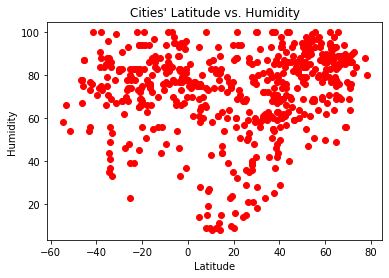

In [76]:
#Scatter Plot for Lat vs Humidity

x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.scatter(x_values, y_values, color = "r")
plt.title("Cities' Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save the plot and show it
plt.savefig("Images/Lat_vs_Hum.png")
plt.show()

plt.close()

- From the scatter plot above, it can be assumed that there is no relation between cities' latitude and humidity.

## Latitude vs. Cloudiness Plot

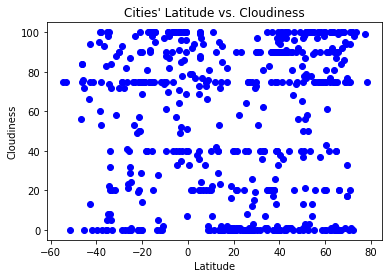

In [77]:
#Scatter Plot for Lat vs Humidity

x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values, y_values, color = "b")
plt.title("Cities' Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save the plot and show it
plt.savefig("Images/Lat_vs_Cloud.png")
plt.show()

plt.close()

- Cities' Latitude vs Cloudiness scatterplot shows that it does not matter the latitude of a city, the cloudiness can be expected to behavior at any level.

## Latitude vs. Wind Speed Plot

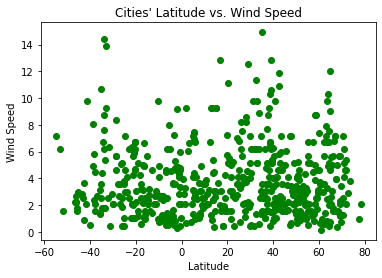

In [78]:
#Scatter Plot for Lat vs Humidity

x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values, y_values, color = "g")
plt.title("Cities' Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Save the plot and show it
plt.savefig("Images/Lat_vs_Wind.png")
plt.show()

plt.close()

- Even when relationship between Latitude and Wind Speed does not seem to be highly strong, it is a slightly behavior in cities with a higher and lower latitude, where the wind speed is higher too, we can see this specially in cities with a latitude above and below 40 degrees.

## Linear Regression

In [86]:
#Define Northern Hemisphere & Southern Hemisphere

northern_hemisphere = weather_df.loc[weather_df["Lat"] >=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is: y = -0.83x + 309.49
The R-squared is: 0.6970342768440199


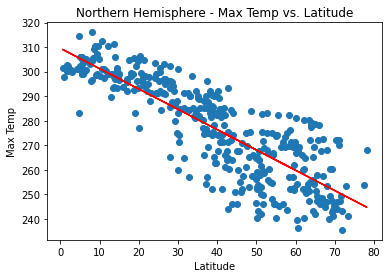

In [87]:
x_values = northern_hemisphere["Lat"]
y_values = nothern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Print r squared value
print(f"The line equation is: {line_eq}")
print(f"The R-squared is: {rvalue**2}")

#Save the plot and show it
plt.savefig("Images/NH_Temp_vs_Latitude.png")
plt.show()

plt.close()

- The relationship for Max Temp and Latitude in Nothern Hemisphere's cities is negative. On the line equation it can be seen that the expected behavior is that for each degree that the latitude increased, the max temperature will decrease in 0.83 degrees. For the R squared it can be assumed that the regression line explained well the data behavior.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is: y = 0.29x + 303.01
The R-squared is: 0.4404066487912844


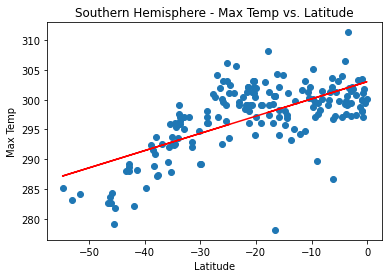

In [82]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Print r squared value
print(f"The line equation is: {line_eq}")
print(f"The R-squared is: {rvalue**2}")

#Save the plot and show it
plt.savefig("Images/SH_Temp_vs_Latitude.png")
plt.show()

plt.close()

- The latitude and max temperature in Southern Hemisphere's cities have a positive relation. The interpretation for the line equation is that for one increase on the latitude degrees, it will be expected that the Max Temperature rise too by 0.29 degrees. The R squared does not fit as well as with nothern hemisphere's cities, but is close to 50%, so it could explained the model well.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is: y = 0.45x + 53.52
The R-squared is: 0.17736742058384933


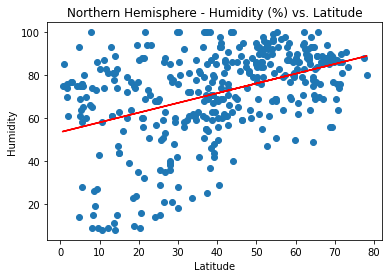

In [90]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Print r squared value
print(f"The line equation is: {line_eq}")
print(f"The R-squared is: {rvalue**2}")

#Save the plot and show it
plt.savefig("Images/NH_Hum_vs_Latitude.png")
plt.show()

plt.close()

- As it has be seen with the general relation between the percentage of Humidity and Latitude, it appears that for Nothern Hemisphere's cities also does not exist relation between these variables. This is expressed as well by the low R-squared.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is: y = 0.18x + 78.61
The R-squared is: 0.023260765458535303


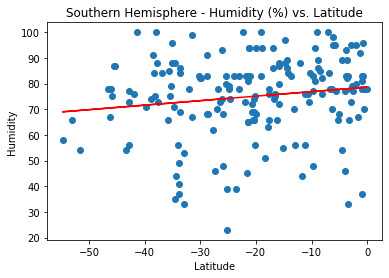

In [84]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Print r squared value
print(f"The line equation is: {line_eq}")
print(f"The R-squared is: {rvalue**2}")

#Save the plot and show it
plt.savefig("Images/SH_Hum_vs_Latitude.png")
plt.show()

plt.close()

- For Southern Hemisphere's cities it also appears that does not exist relation between the percentage of humidity and latitude, the R squared is even lower than for Nothern Hemisphere's cities, which talks about a poor prediction of the independent variable with dependent variable's data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is: y = 0.45x + 34.75
The R-squared is: 0.053164969672680605


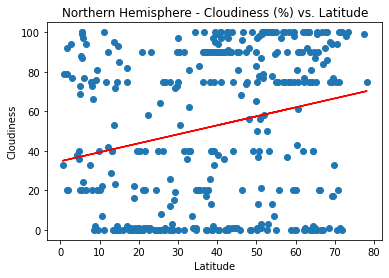

In [91]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Print r squared value
print(f"The line equation is: {line_eq}")
print(f"The R-squared is: {rvalue**2}")

#Save the plot and show it
plt.savefig("Images/NH_Cloud_vs_Latitude.png")
plt.show()

plt.close()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is: y = 0.62x + 73.82
The R-squared is: 0.059401501658865166


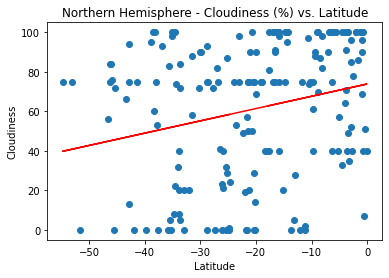

In [92]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Print r squared value
print(f"The line equation is: {line_eq}")
print(f"The R-squared is: {rvalue**2}")

#Save the plot and show it
plt.savefig("Images/SH_Cloud_vs_Latitude.png")
plt.show()

plt.close()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression